In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('C:\\Users\\HP\\Project\\data\\combined_csv.csv')

E:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (10,14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data = df[(df['Age_Code']=='Year')&(df['Age']>=15)]
len(data)

1348108

In [5]:
data = data.dropna(subset=['Haemoglobin_level'],axis=0)


In [6]:
#Drop Columns of 3 years and 5 years
cols_under5 = ['illness_type','illness_duration', 'treatment_type']
cols_under3 = ['first_breast_feeding', 'is_cur_breast_feeding',
       'day_or_mn_for_breast_feeding_cd', 'day_or_month_for_breast_feeding',
       'water_month', 'ani_milk_month', 'semisolid_month_or_day',
       'solid_month', 'vegetables_month_or_day']
data = data.drop(cols_under5, axis = 1)
data = data.drop(cols_under3, axis = 1)

In [7]:
data.columns

Index(['state_code', 'district_code', 'rural_urban', 'stratum', 'PSU_ID',
       'ahs_house_unit', 'house_hold_no', 'date_survey', 'test_salt_iodine',
       'record_code_iodine', 'record_code_iodine_reason', 'sl_no', 'Sex',
       'usual_residance', 'usual_residance_Reason', 'identification_code',
       'Age_Code', 'Age', 'date_of_birth', 'month_of_birth', 'year_of_birth',
       'Weight_measured', 'Weight_in_kg', 'Length_height_measured',
       'length_height_code', 'Length_height_cm', 'Haemoglobin_test',
       'Haemoglobin', 'Haemoglobin_level', 'BP_systolic',
       'BP_systolic_2_reading', 'BP_Diastolic', 'BP_Diastolic_2reading',
       'Pulse_rate', 'Pulse_rate_2_reading', 'Diabetes_test',
       'fasting_blood_glucose', 'fasting_blood_glucose_mg_dl',
       'Marital_status', 'gauna_perfor_not_perfor', 'duration_pregnanacy'],
      dtype='object')

In [8]:
# Drop unwanted variables
data = data.drop(['PSU_ID', 'ahs_house_unit', 'house_hold_no','date_survey', 'record_code_iodine_reason', 'sl_no', 'usual_residance', 'usual_residance_Reason', 'identification_code','Age_Code','date_of_birth', 'month_of_birth', 'year_of_birth','Weight_measured','Length_height_measured',
       'length_height_code','Haemoglobin_test','Haemoglobin','Diabetes_test', 'fasting_blood_glucose'], axis = 1)

In [10]:
data['Sex'] = data['Sex'].map({'Male': 1, 'Female': 2})

In [11]:
data['Sex'].value_counts()

2    450035
1    391563
Name: Sex, dtype: int64

In [12]:
data.isnull().sum()

state_code                          0
district_code                       0
rural_urban                         0
stratum                             0
test_salt_iodine                    0
record_code_iodine                  0
Sex                                 0
Age                                 0
Weight_in_kg                     8776
Length_height_cm                 9630
Haemoglobin_level                   0
BP_systolic                     89755
BP_systolic_2_reading           89820
BP_Diastolic                    89763
BP_Diastolic_2reading           89846
Pulse_rate                      89767
Pulse_rate_2_reading            89859
fasting_blood_glucose_mg_dl    102478
Marital_status                 518750
gauna_perfor_not_perfor        614776
duration_pregnanacy            800326
dtype: int64

In [13]:
data['state_code'] = data['state_code'].astype('category')
# Assigning numerical values and storing in another column
data['state_code'] = data['state_code'].cat.codes

In [14]:
data['rural_urban'] = data['rural_urban'].astype('category')
# Assigning numerical values and storing in another column
data['rural_urban'] = data['rural_urban'].cat.codes


In [16]:
data['district_code'] = data['district_code'].astype('category')
# Assigning numerical values and storing in another column
data['district_code'] = data['district_code'].cat.codes


In [17]:
data['stratum'] = data['stratum'].astype('category')
# Assigning numerical values and storing in another column
data['stratum'] = data['stratum'].cat.codes

In [18]:
data['record_code_iodine'] = data['record_code_iodine'].astype('category')
# Assigning numerical values and storing in another column
data['record_code_iodine'] = data['record_code_iodine'].cat.codes


In [19]:
data['Marital_status'].value_counts()

Married and Gauna perfomed         227242
Never married                       81895
Married but Gauna not performed      7095
Widow                                4308
Not Stated                            910
Separated                             786
Divorced                              369
Remarried                             243
Name: Marital_status, dtype: int64

In [20]:
data['Marital_status'] = data['Marital_status'].map({'Married and Gauna perfomed': 1, 'Never married': 2,'Married but Gauna not performed':3,'Widow':4,
                                                    'Separated':5,'Divorced':6,'Remarried':7,'Not Stated':8,'NaN':-1})

In [21]:
data['Marital_status'].value_counts()

1.0    227242
2.0     81895
3.0      7095
4.0      4308
8.0       910
5.0       786
6.0       369
7.0       243
Name: Marital_status, dtype: int64

In [22]:
data['Marital_status'] = data['Marital_status'].where(~(data['Marital_status']==8.0), other = np.nan)

In [24]:
data['Marital_status'].isnull().sum()

519660

In [25]:
data['gauna_perfor_not_perfor'].value_counts()

Non-pregnant or Non-lactating    184297
Lactating                         26687
Pregnant                          15832
0                                     5
6                                     1
Name: gauna_perfor_not_perfor, dtype: int64

In [23]:
data['gauna_perfor_not_perfor'] = data['gauna_perfor_not_perfor'].map({'Pregnant':1, 'Lactating': 2,'Non-pregnant or Non-lactating':3})

In [24]:
data['gauna_perfor_not_perfor'].value_counts()

3.0    184297
2.0     26687
1.0     15832
Name: gauna_perfor_not_perfor, dtype: int64

In [28]:
data['gauna_perfor_not_perfor'].isnull().sum()

614782

In [39]:
from matplotlib import pyplot as plt # plotting
from math import *

<function matplotlib.pyplot.show(*args, **kw)>

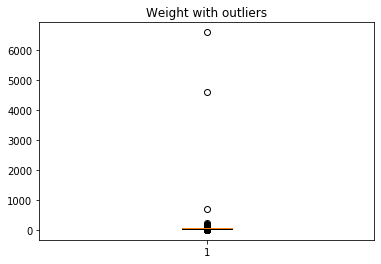

In [41]:
plt.boxplot(data['Weight_in_kg'].dropna())
plt.title('Weight with outliers')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

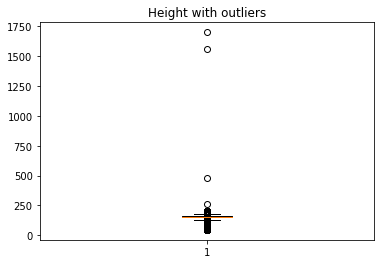

In [45]:
plt.boxplot(data['Length_height_cm'].dropna())
plt.title('Height with outliers')
plt.show

In [46]:
def remove_outliers(data, feature):
    stdev = sqrt(np.var(data[feature].dropna()))
    median = np.median(data[feature].dropna())
    print("number of discarded measurements")
    display(len(data[[feature]].where(abs(data[feature] - median)>(3*stdev)).dropna()))
# keep original values if difference from mean is less than 3 standard deviations. NA otherwise
    return data[[feature]].where(abs(data[feature] - median)<(3*stdev), other = np.nan)

In [47]:
data['Length_height_cm'] = remove_outliers(data, 'Length_height_cm')

number of discarded measurements


3697

In [48]:
print('number of discarded measurements')
display(len(data[data['Weight_in_kg']<20]))
data['Weight_in_kg'] = data['Weight_in_kg'].where(data['Weight_in_kg']>20, other=np.nan)

number of discarded measurements


1871

<function matplotlib.pyplot.show(*args, **kw)>

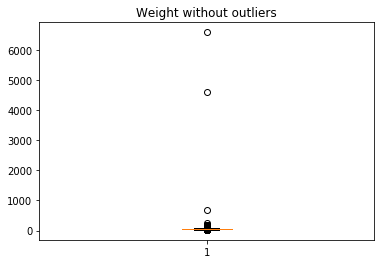

In [49]:
plt.boxplot(data['Weight_in_kg'].dropna())
plt.title('Weight without outliers')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

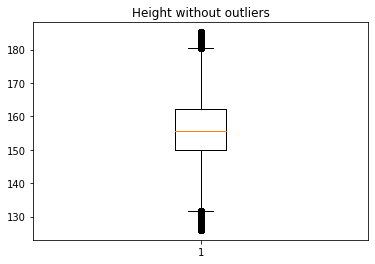

In [50]:
plt.boxplot(data['Length_height_cm'].dropna())
plt.title('Height without outliers')
plt.show

In [51]:
data['bmi'] = data['Weight_in_kg']/(data['Length_height_cm']/100)**2

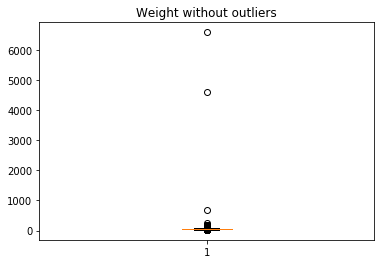

In [53]:
plt.boxplot(data['Weight_in_kg'].dropna())
plt.title('Weight without outliers')
plt.show()

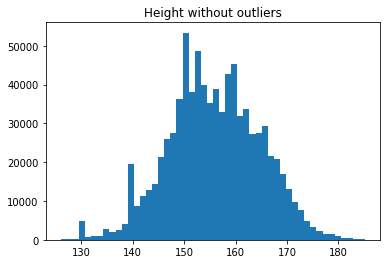

In [54]:
plt.hist(data['Length_height_cm'].dropna(), bins = 50)
plt.title('Height without outliers')
plt.show()


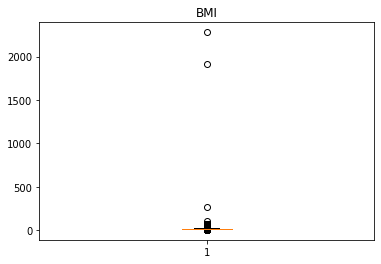

In [56]:
plt.boxplot(data['bmi'].dropna())
plt.title('BMI')
plt.show()

In [57]:
def remove_outliers_difference(data, col1, col2):
    stdev = sqrt((data[col1] - data[col2]).var())
# how many measurements were excluded
    print('number of discarded measurements')
    display(len(data[[col1, col2]].where(abs(data[col1] - data[col2])>(3*stdev)).dropna()))
# keep original values if difference of two measurements is less than 3 standard deviations. NA otherwise
    return data[[col1, col2]].where(abs(data[col1] - data[col2])<(3*stdev), other = np.nan)

In [58]:
data[['BP_systolic', 'BP_systolic_2_reading']] = remove_outliers_difference(data, 'BP_systolic', 'BP_systolic_2_reading')
data[['BP_Diastolic', 'BP_Diastolic_2reading']] = remove_outliers_difference(data, 'BP_Diastolic', 'BP_Diastolic_2reading')
data[['Pulse_rate', 'Pulse_rate_2_reading']] = remove_outliers_difference(data, 'Pulse_rate', 'Pulse_rate_2_reading')

number of discarded measurements


10501

number of discarded measurements


13169

number of discarded measurements


12271

In [59]:
def aggregate_readings(data, col1, col2):
    data[col1] = data.apply(lambda row: sum([row[col1], row[col2]])/2, axis = 1)
    data = data.drop(col2, axis = 1)
    return data

In [60]:
data = aggregate_readings(data, 'BP_systolic', 'BP_systolic_2_reading')
data = aggregate_readings(data, 'BP_Diastolic', 'BP_Diastolic_2reading')
data = aggregate_readings(data, 'Pulse_rate', 'Pulse_rate_2_reading')

In [61]:
data[['BP_Diastolic', 'BP_systolic']] = data[['BP_Diastolic', 'BP_systolic']].where(data.BP_Diastolic < data.BP_systolic, other = np.nan)

<function matplotlib.pyplot.show(*args, **kw)>

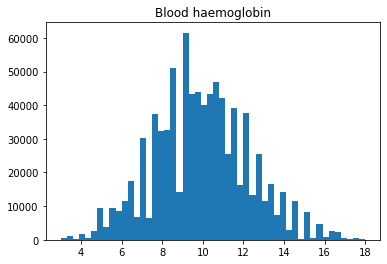

In [63]:
plt.hist(data['Haemoglobin_level'], bins = 50)
plt.title('Blood haemoglobin')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

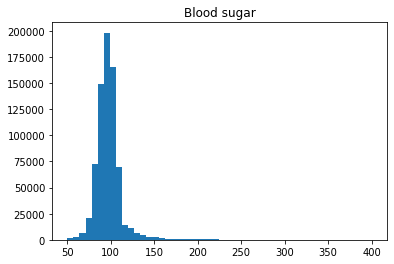

In [64]:
plt.hist(data.fasting_blood_glucose_mg_dl[~np.isnan(data.fasting_blood_glucose_mg_dl)], bins=50)
plt.title('Blood sugar')
plt.show

In [65]:
data['fasting_blood_glucose_mg_dl'] = remove_outliers(data,'fasting_blood_glucose_mg_dl')

number of discarded measurements


10932

<function matplotlib.pyplot.show(*args, **kw)>

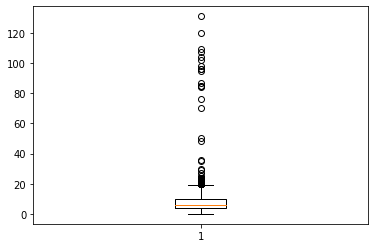

In [66]:
plt.boxplot(data['duration_pregnanacy'].dropna())
plt.show

In [67]:
corr=data.corr()[['Haemoglobin_level', 'Pulse_rate', 'BP_Diastolic', 'BP_systolic', 'fasting_blood_glucose_mg_dl']]
corr.where(abs(corr)>0.1)

,Haemoglobin_level,Pulse_rate,BP_Diastolic,BP_systolic,fasting_blood_glucose_mg_dl
state_code,NaN,NaN,NaN,NaN,NaN
district_code,NaN,NaN,NaN,NaN,NaN
rural_urban,NaN,NaN,NaN,NaN,NaN
stratum,NaN,NaN,NaN,NaN,NaN
test_salt_iodine,NaN,NaN,NaN,NaN,NaN
record_code_iodine,NaN,NaN,NaN,NaN,NaN
Sex,-0.164683,0.151557,NaN,NaN,NaN
Age,NaN,NaN,0.185953,0.329268,0.188744
Weight_in_kg,0.103391,NaN,0.210848,0.169795,NaN
Length_height_cm,0.173031,NaN,NaN,NaN,NaN


In [69]:
data_correlated = data.drop(['state_code','district_code','rural_urban', 'stratum', 'test_salt_iodine', 'record_code_iodine', 'duration_pregnanacy'], axis = 1)
corr = data_correlated.corr()[['Haemoglobin_level', 'Pulse_rate', 'BP_Diastolic', 'BP_systolic', 'fasting_blood_glucose_mg_dl']]
corr.where(abs(corr)>0.1)

,Haemoglobin_level,Pulse_rate,BP_Diastolic,BP_systolic,fasting_blood_glucose_mg_dl
Sex,-0.164683,0.151557,NaN,NaN,NaN
Age,NaN,NaN,0.185953,0.329268,0.188744
Weight_in_kg,0.103391,NaN,0.210848,0.169795,NaN
Length_height_cm,0.173031,NaN,NaN,NaN,NaN
Haemoglobin_level,1.000000,NaN,NaN,NaN,NaN
BP_systolic,NaN,NaN,0.689061,1.000000,0.144951
BP_Diastolic,NaN,0.202840,1.000000,0.689061,0.106355
Pulse_rate,NaN,1.000000,0.202840,NaN,NaN
fasting_blood_glucose_mg_dl,NaN,NaN,0.106355,0.144951,1.000000
Marital_status,NaN,NaN,NaN,NaN,NaN


In [73]:
data_anemia = data[["stratum","test_salt_iodine","record_code_iodine","Sex","Age","Weight_in_kg","Length_height_cm","Haemoglobin_level","BP_systolic","BP_Diastolic","Pulse_rate",\
                    "fasting_blood_glucose_mg_dl","Marital_status",'gauna_perfor_not_perfor',"duration_pregnanacy","bmi"]]
data_anemia.head()

,stratum,test_salt_iodine,record_code_iodine,Sex,Age,Weight_in_kg,Length_height_cm,Haemoglobin_level,BP_systolic,BP_Diastolic,Pulse_rate,fasting_blood_glucose_mg_dl,Marital_status,gauna_perfor_not_perfor,duration_pregnanacy,bmi
0,2,7,0,2,37.0,48.099998,147.89999,8.0,125.5,67.0,75.0,89.0,1.0,3.0,NaN,21.989167
1,2,7,0,1,17.0,25.600000,160.30000,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.962605
7,2,7,0,2,47.0,49.200001,147.70000,10.5,133.0,91.0,97.0,91.0,1.0,3.0,NaN,22.552990
10,2,7,0,1,33.0,53.599998,164.10001,8.0,126.5,89.0,75.0,90.0,NaN,NaN,NaN,19.904330
11,2,7,0,2,25.0,47.000000,147.80000,11.0,116.5,67.5,94.5,96.0,1.0,2.0,7.0,21.515378


In [74]:
data_anemia.isnull().sum()

stratum                             0
test_salt_iodine                    0
record_code_iodine                  0
Sex                                 0
Age                                 0
Weight_in_kg                    10771
Length_height_cm                13327
Haemoglobin_level                   0
BP_systolic                    110984
BP_Diastolic                   110984
Pulse_rate                     102134
fasting_blood_glucose_mg_dl    113410
Marital_status                 519660
gauna_perfor_not_perfor        614782
duration_pregnanacy            800326
bmi                             14931
dtype: int64

In [75]:
data_anemia.describe(include='all')

,stratum,test_salt_iodine,record_code_iodine,Sex,Age,Weight_in_kg,Length_height_cm,Haemoglobin_level,BP_systolic,BP_Diastolic,Pulse_rate,fasting_blood_glucose_mg_dl,Marital_status,gauna_perfor_not_perfor,duration_pregnanacy,bmi
count,841598.000000,841598.000000,841598.00000,841598.000000,841598.000000,830827.000000,828271.000000,841598.000000,730614.000000,730614.000000,739464.000000,728188.000000,321938.000000,226816.000000,41272.000000,826667.000000
mean,1.101860,22.603281,0.88584,1.534739,38.092406,50.118455,155.807624,9.906834,122.544437,78.098151,80.285836,95.812514,1.358628,2.742739,8.075233,20.589823
std,0.898587,10.012754,0.41952,0.498792,16.964936,13.486092,8.928013,2.339199,18.660400,12.852934,11.592064,12.053723,0.655169,0.575049,5.990574,4.794755
min,0.000000,0.000000,0.00000,1.000000,15.000000,20.100000,126.000000,3.000000,60.000000,40.000000,40.000000,50.000000,1.000000,1.000000,0.000000,6.509600
25%,0.000000,15.000000,1.00000,1.000000,24.000000,43.099998,150.000000,8.400000,110.500000,70.000000,72.000000,89.000000,1.000000,3.000000,4.000000,18.285029
50%,1.000000,30.000000,1.00000,2.000000,35.000000,49.500000,155.600010,9.800000,121.000000,78.000000,79.500000,96.000000,1.000000,3.000000,6.000000,20.319494
75%,2.000000,30.000000,1.00000,2.000000,50.000000,55.900002,162.200000,11.500000,132.500000,85.500000,87.500000,102.000000,2.000000,3.000000,10.000000,22.414988
max,2.000000,67.000000,2.00000,2.000000,100.000000,6602.000000,185.200000,18.000000,249.500000,160.000000,140.000000,154.000000,7.000000,3.000000,131.000000,2279.063409


In [113]:
#Sex=2 means female, gauna_perfor_not_perfor']==1 means pregnant
data_anemia_female=data_anemia[(data_anemia['Sex'] == 2)]
data_anemia_female['anemia'] = np.where(((data_anemia_female['Haemoglobin_level'] <= 7.0) & (data_anemia_female['gauna_perfor_not_perfor']==1)), 1, 0)

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [114]:
data_anemia_female['anemia'].value_counts()

0    447148
1      2887
Name: anemia, dtype: int64

In [116]:
data_anemia_female.isnull().sum()

stratum                        0
test_salt_iodine               0
record_code_iodine             0
Sex                            0
Age                            0
Weight_in_kg                   0
Length_height_cm               0
Haemoglobin_level              0
BP_systolic                    0
BP_Diastolic                   0
Pulse_rate                     0
fasting_blood_glucose_mg_dl    0
Marital_status                 0
gauna_perfor_not_perfor        0
duration_pregnanacy            0
bmi                            0
anemia                         0
dtype: int64

In [117]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
data_anemia_female_imputed = pd.DataFrame(imputer.fit_transform(data_anemia_female))
data_anemia_female_imputed.columns = data_anemia_female.columns
data_anemia_female_imputed.index = data_anemia_female.index
data_anemia_female = data_anemia_female_imputed

In [118]:
data_anemia_female.isnull().sum()

stratum                        0
test_salt_iodine               0
record_code_iodine             0
Sex                            0
Age                            0
Weight_in_kg                   0
Length_height_cm               0
Haemoglobin_level              0
BP_systolic                    0
BP_Diastolic                   0
Pulse_rate                     0
fasting_blood_glucose_mg_dl    0
Marital_status                 0
gauna_perfor_not_perfor        0
duration_pregnanacy            0
bmi                            0
anemia                         0
dtype: int64

In [119]:
from sklearn.model_selection import train_test_split

X = data_anemia_female
y = data_anemia_female.anemia

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [120]:
X_train.groupby('anemia')['anemia'].count()

anemia
0.0    357693
1.0      2335
Name: anemia, dtype: int64

In [121]:
y_train = X_train.pop('anemia')
y_test = X_test.pop('anemia')

In [122]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=0).fit(X_train, y_train)

In [123]:
y_pred = rf.predict(X_test)
confusion_matrix_result = confusion_matrix(y_test.values, y_pred)
print("Confusion matrix:\n%s" % confusion_matrix_result)

Confusion matrix:
[[89455     0]
 [   25   527]]


In [124]:
from sklearn.metrics import  classification_report, accuracy_score

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     89455
         1.0       1.00      0.95      0.98       552

    accuracy                           1.00     90007
   macro avg       1.00      0.98      0.99     90007
weighted avg       1.00      1.00      1.00     90007



In [125]:
print("Accuracy: %.2f" % accuracy_score(y_test, y_pred))

Accuracy: 1.00
